<a href="https://colab.research.google.com/github/mialdrid/Python/blob/master/MAldridge_V2_MSIS549_HW2_CNN_RockPaperScissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MSIS 579 HW2 CNN to recognize Rock/Paper/Scissors

In this homework, we will train a convolution neural network to recognize gesture Rock/Paper/Scissors. 

## Load Rock/Paper/Scissors Dataset
First we download the data and put them into its own directories for model training and evaluation. There are two dataset in zip format. Download each and put them into the corresponding directories.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-04-21 18:10:57--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.14.112, 2607:f8b0:4007:80e::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.14.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  92.9MB/s    in 2.1s    

2020-04-21 18:11:00 (92.9 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-04-21 18:11:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.11.176, 2607:f8b0:4007:808::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.11.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/

In [2]:
%tensorflow_version 1.14
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import os
import zipfile
import shutil

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


After running the folloiwng code, you will have exactly 840 images for each gesture. 

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock07-k03-007.png', 'rock05ck01-110.png', 'rock04-087.png', 'rock03-090.png', 'rock07-k03-071.png', 'rock04-059.png', 'rock04-012.png', 'rock05ck01-012.png', 'rock02-061.png', 'rock05ck01-040.png']
['paper04-103.png', 'paper01-084.png', 'paper03-114.png', 'paper05-043.png', 'paper03-042.png', 'paper06-089.png', 'paper05-062.png', 'paper06-035.png', 'paper07-052.png', 'paper05-010.png']
['scissors02-099.png', 'testscissors01-029.png', 'testscissors02-042.png', 'scissors01-097.png', 'testscissors03-084.png', 'testscissors03-014.png', 'testscissors01-070.png', 'scissors02-069.png', 'scissors03-092.png', 'testscissors01-035.png']


Now, let's plot 2 images from each class.  You wil find those images are taken from different views and images vary a lot even for the same gesture. 

/tmp/rps/rock/rock07-k03-007.png


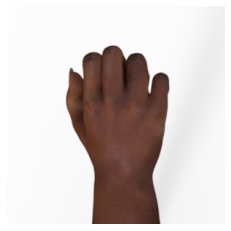

/tmp/rps/rock/rock05ck01-110.png


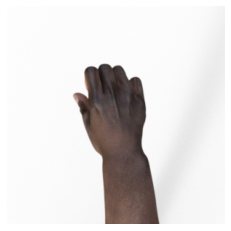

/tmp/rps/paper/paper04-103.png


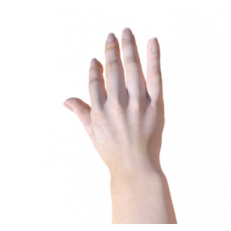

/tmp/rps/paper/paper01-084.png


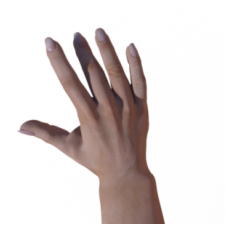

/tmp/rps/scissors/scissors02-099.png


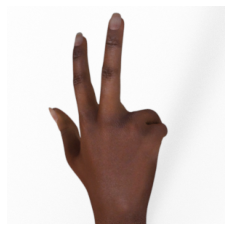

/tmp/rps/scissors/testscissors01-029.png


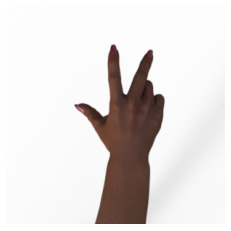

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [0]:
# The path to the directory where the original dataset was uncompressed
original_dataset_dir = '/tmp'

# The directory where we will
# store our smaller dataset
base_dir = '/tmp/rock_paper_scissors'
if os.path.exists(base_dir):
  shutil.rmtree(base_dir)
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training paper pictures
train_paper_dir = os.path.join(train_dir, 'paper')
os.mkdir(train_paper_dir)

# Directory with our training rock pictures
train_rock_dir = os.path.join(train_dir, 'rock')
os.mkdir(train_rock_dir)

# Directory with our training scissors pictures
train_scissors_dir = os.path.join(train_dir, 'scissors')
os.mkdir(train_scissors_dir)

# Directory with our validation paper pictures
validation_paper_dir = os.path.join(validation_dir, 'paper')
os.mkdir(validation_paper_dir)

# Directory with our validation rock pictures
validation_rock_dir = os.path.join(validation_dir, 'rock')
os.mkdir(validation_rock_dir)

# Directory with our validation scissors pictures
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
os.mkdir(validation_scissors_dir)

# Directory with our test paper pictures
test_paper_dir = os.path.join(test_dir, 'paper')
os.mkdir(test_paper_dir)

# Directory with our test rock pictures
test_rock_dir = os.path.join(test_dir, 'rock')
os.mkdir(test_rock_dir)

# Directory with our test scissors pictures
test_scissors_dir = os.path.join(test_dir, 'scissors')
os.mkdir(test_scissors_dir)

In [0]:
#Rename files in the directory with a simplier name syntax
os.chdir('/tmp/rps/paper')
i=0
for x in os.listdir('/tmp/rps/paper'):
  src=x
  dst="paper"+str(i)+".png"
  os.rename(src,dst)
  i= i + 1

os.chdir('/tmp/rps/rock')
i=0
for x in os.listdir('/tmp/rps/rock'):
  src=x
  dst="rock"+str(i)+".png"
  os.rename(src,dst)
  i= i + 1

os.chdir('/tmp/rps/scissors')
i=0
for x in os.listdir('/tmp/rps/scissors'):
  src=x
  dst="scissors"+str(i)+".png"
  os.rename(src,dst)
  i= i + 1

In [0]:
# Copy first 420 paper images to train_paper_dir 'paper.{}.jpg'.
fnames = ['paper{}.png'.format(i) for i in range(420)]
for fname in fnames:
  src = os.path.join('/tmp/rps/paper', fname)
  dst = os.path.join(train_paper_dir, fname)
  shutil.copyfile(src, dst)  

# Copy next 210 paper images to validation_paper_dir
fnames = ['paper{}.png'.format(i) for i in range(420,630)]
for fname in fnames:
  src = os.path.join('/tmp/rps/paper', fname)
  dst = os.path.join(validation_paper_dir, fname)
  shutil.copyfile(src, dst)

# Copy next 210 paper images to test_paper_dir
fnames = ['paper{}.png'.format(i) for i in range(630, 840)]
for fname in fnames:
    src = os.path.join('/tmp/rps/paper', fname)
    dst = os.path.join(test_paper_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
# Copy first 420 rock images to train_rock_dir
fnames = ['rock{}.png'.format(i) for i in range(420)]
for fname in fnames:
    src = os.path.join('/tmp/rps/rock', fname)
    dst = os.path.join(train_rock_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 210 rock images to validation_rock_dir
fnames = ['rock{}.png'.format(i) for i in range(420, 630)]
for fname in fnames:
    src = os.path.join('/tmp/rps/rock', fname)
    dst = os.path.join(validation_rock_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 210 rock images to test_rock_dir
fnames = ['rock{}.png'.format(i) for i in range(630, 840)]
for fname in fnames:
    src = os.path.join('/tmp/rps/rock', fname)
    dst = os.path.join(test_rock_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
# Copy first 420 scissors images to train_scissors_dir
fnames = ['scissors{}.png'.format(i) for i in range(420)]
for fname in fnames:
    src = os.path.join('/tmp/rps/scissors', fname)
    dst = os.path.join(train_scissors_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 210 scissors images to validation_scissors_dir
fnames = ['scissors{}.png'.format(i) for i in range(420, 630)]
for fname in fnames:
    src = os.path.join('/tmp/rps/scissors', fname)
    dst = os.path.join(validation_scissors_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 210 scissors images to test_scissors_dir
fnames = ['scissors{}.png'.format(i) for i in range(630, 840)]
for fname in fnames:
    src = os.path.join('/tmp/rps/scissors', fname)
    dst = os.path.join(test_scissors_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
print('total training paper images:', len(os.listdir(train_paper_dir)))
print('total training rock images:', len(os.listdir(train_rock_dir)))
print('total training scissor images:', len(os.listdir(train_scissors_dir)))
print('total validation paper images:', len(os.listdir(validation_paper_dir)))
print('total validation rock images:', len(os.listdir(validation_rock_dir)))
print('total validation scissor images:', len(os.listdir(validation_scissors_dir)))
print('total test paper images:', len(os.listdir(test_paper_dir)))
print('total test rock images:', len(os.listdir(test_rock_dir)))
print('total test scissor images:', len(os.listdir(test_scissors_dir)))

total training paper images: 420
total training rock images: 420
total training scissor images: 420
total validation paper images: 210
total validation rock images: 210
total validation scissor images: 210
total test paper images: 210
total test rock images: 210
total test scissor images: 210


## TASK 1: Build a fully connect Neural Network
First, let's try what we've learned from the previous lecture. We will build a FULLY connect neural networks to classify the gesture images.You are free to experiment with different structure of the network, data augmentation, dropout, different optimizer, and etc, to try to achieve the best performance on the TEST data in terms of accuracy.  Watch out for overfitting.

Note that you should set test aside when you train your model. In the end, please report your model accuracy on the test set. 

In [0]:
# Import modules
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [13]:
# Build the network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1260 images belonging to 3 classes.
Found 630 images belonging to 3 classes.


In [0]:
#fit the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 16s 160ms/step - loss: 14.0741 - acc: 0.3285 - val_loss: 424.1843 - val_acc: 0.3404
Epoch 2/30
100/100 [==============================] - 10s 96ms/step - loss: -55601.8207 - acc: 0.3415 - val_loss: -449955.4062 - val_acc: 0.3276
Epoch 3/30
100/100 [==============================] - 10s 95ms/step - loss: -2309514.6312 - acc: 0.3295 - val_loss: -27533604.0000 - val_acc: 0.3343
Epoch 4/30
100/100 [==============================] - 10s 96ms/step - loss: -37970031.8750 - acc: 0.3335 - val_loss: -157745888.0000 - val_acc: 0.3347
Epoch 5/30
100/100 [==============================] - 9s 92ms/step - loss: -138072487.2950 - acc: 0.3390 - val_loss: -881080960.0000 - val_acc: 0.3303
Epoch 6/30
100/100 [==============================] - 10s 102ms/step - loss: -510596083.7400 - acc: 0.3355 - val_loss: -84853296.0000 - val_acc: 0.3357
Epoch 7/30
100/100 [==============================] - 10s 96ms/step - loss: -1745502705.0900 - acc: 0.3345 - val_l

In [0]:
#Plot model results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## TASK 2: Build Convolution Neural Network
Now, let's try a convolution neural network (CNN) and see if we can achieve better performance. Similarly you are free to experiment with different structure of the network, techniques to avoid overfitting, different optimizer, and etc, to try to achieve the best performance on the TEST data in terms of accuracy.

Note that you should set test aside when you train your model. In the end, please report your model accuracy on the test set. 

In [0]:
#Import modules
from keras import layers
from keras import models
# Create a CNN with 4 convolution layers with a flatten layer and a fully connected hidden layer
#Build layer 1
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)) )
model.add(layers.MaxPool2D(pool_size=(2,2)))
#build layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#build layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#build layer 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#flatten to a 1D array
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
#Look at how the dimensions of the feature map change with each successive layer
model.summary()

In [0]:
#Specify the loss and optimizer
#import optimizer
from keras import optimizers
#Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=0.001),
    metrics=['acc']
)

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

## Use the best model to classify gestures
You can now run the following code and use the model you trained to classify images uploaded from your laptop. Let us know how your model performs on the new unseen images.  

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)